1 - Importando Bibliotecas Necessárias

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cadup\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cadup\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

2 - Carregando a Base de Dados

In [3]:
df = pd.read_csv('./data/spam.csv', encoding='latin-1')
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.columns = ["label", "message"]
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df['label'].unique().tolist() # visualizando a quantidade de classes

['ham', 'spam']

3 - Preprocessamento

In [5]:
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove caracteres especiais
    text = text.lower()  # Converte para minúsculas
    text = re.sub(r'\s+', ' ', text)  # Remove espaços extras
    tokens = word_tokenize(text)  # Tokeniza o texto
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

In [6]:
df['message'] = df['message'].apply(preprocess_text)

4 - Divisão dos Dados

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

5 - Vetorização

In [8]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

6 - Treinamento do Modelo

In [9]:
model = MultinomialNB()
model.fit(X_train_counts, y_train)

MultinomialNB()

7 - Avaliação do Modelo

In [10]:
y_pred = model.predict(X_test_counts)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [11]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9820627802690582
Confusion Matrix:
[[959   6]
 [ 14 136]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.91      0.93       150

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



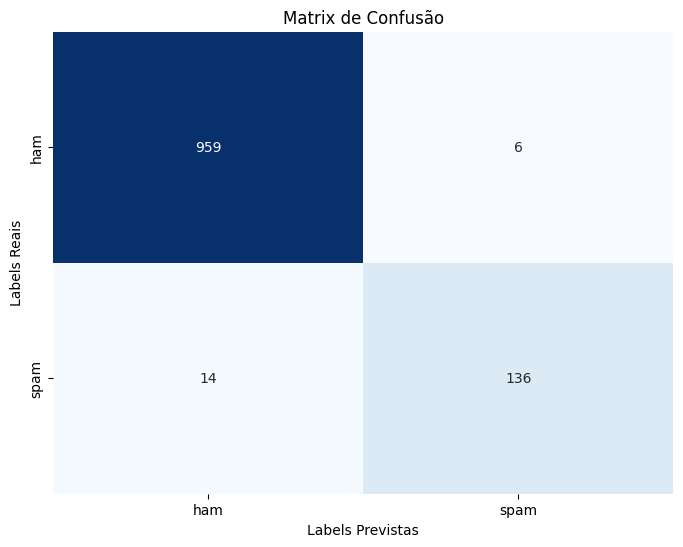

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Labels Previstas')
plt.ylabel('Labels Reais')
plt.title('Matrix de Confusão')
plt.show()